# Milestone 2 Implementation
- Kevin Mak
- Peter Lee
- Ryan Peng

In [64]:
import pandas as pd

url = 'https://github.com/dispeter/dsci320/blob/main/spotify_tracks.csv?raw=true'
raw_spotify = pd.read_csv(url)

# filter songs by genres relating to countries around the world
genres = ['brazil', 'british', 'cantopop', 'french', 'german', 'indian', 'iranian', 'j-pop', 'k-pop', 'latin', 'latino', 'malay', 'mandopop', 'pop', 'spanish', 'swedish', 'turkish']
spotify = raw_spotify[raw_spotify["track_genre_1"].isin(genres)]

#drop irrelevant attributes
spotify = spotify.drop(['track_id', 'artist_2', 'artist_3', 'artist_4', 'track_genre_2', 'track_genre_3', 'track_genre_4', 'track_genre_5', 
                       'explicit', 'time_signature'], axis=1)

#rename columns for easier access
spotify = spotify.rename({'artist_1' : 'artist', 'track_genre_1' : 'genre', 'duartion_s' : 'duration'}, axis=1)  

most_popular_genres = ['k-pop', 'latino', 'indian', 'pop', 'mandopop']
most_popular_spotify = spotify[spotify["genre"].isin(most_popular_genres)]

spotify



,track_name,album_name,artist,genre,mode,key,tempo,duration,popularity,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,energy,valence
8331,Luz em Todo Morro - Acústico,Acústico 3030,3030,brazil,Minor,E,128.14,280.45,47,0.711,-8.597,0.0491,0.7290,0.002830,0.708,0.495,0.514
8332,Brilho Na Alma,Arcano 19,3030,brazil,Minor,B,121.96,206.80,43,0.859,-6.180,0.0556,0.2790,0.000002,0.114,0.661,0.598
8333,Dentro De Um Instante,Arcano 19,3030,brazil,Minor,D,75.02,204.80,46,0.736,-9.999,0.0774,0.6530,0.000035,0.120,0.495,0.437
8334,Raízes,Arcano 19,3030,brazil,Minor,E,83.68,190.57,44,0.604,-11.259,0.0652,0.7940,0.000042,0.102,0.392,0.387
8335,Expectativas,Expectativas,3030,brazil,Minor,B,136.94,201.46,52,0.750,-9.219,0.0580,0.7980,0.000000,0.310,0.507,0.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88813,Dile Kolay Kalbe Değil,Bir Gece Yarası,Zakkum,turkish,Minor,B,165.87,307.42,45,0.430,-6.015,0.0291,0.0418,0.000000,0.127,0.624,0.439
88814,İkimiz de Yorgunuz,Bir Gece Yarası,Zakkum,turkish,Minor,F-sharp,169.96,236.99,41,0.465,-5.885,0.0317,0.2030,0.000000,0.122,0.582,0.532
88815,Hiç mi Özlemedin,"Duble, Vol. 1",Zakkum,turkish,Minor,E,179.86,202.12,42,0.388,-11.964,0.0445,0.2990,0.000142,0.158,0.398,0.429
88816,Sevdalılar Beni Anlar,Derin Aşk 4,Zara,turkish,Minor,E,108.03,241.30,40,0.720,-5.556,0.0373,0.1990,0.000000,0.350,0.723,0.451


In [65]:
# Run this cell to ensure that altair plots show up on gradescope
# We will talk more about what these lines do later in the course
import altair as alt

# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## Visualization 1 (Task 1 + Task 2)


In [3]:
# duration_eda = alt.Chart(spotify).mark_bar().encode(
#     alt.X('duration:Q', bin=alt.BinParams(step=20, maxbins=50, extent=[0, 1000]), title='duration (s)'),
#     alt.Y('count()', title='Number of songs')
# ).properties(
#     title='Durations across all songs'
# )


In [61]:
heatmap_select = alt.selection_multi(fields=['genre'])

task_1_popularity = alt.Chart(spotify).mark_bar().add_selection(
    heatmap_select
).encode(
    alt.X('genre:N', title='Genre', sort='-y'),
    alt.Y('average(popularity)', title='Average popularity'),
    opacity=alt.condition(heatmap_select, alt.value(0.8), alt.value(0.1))
).properties(
    title='Average popularity across each genre'
)

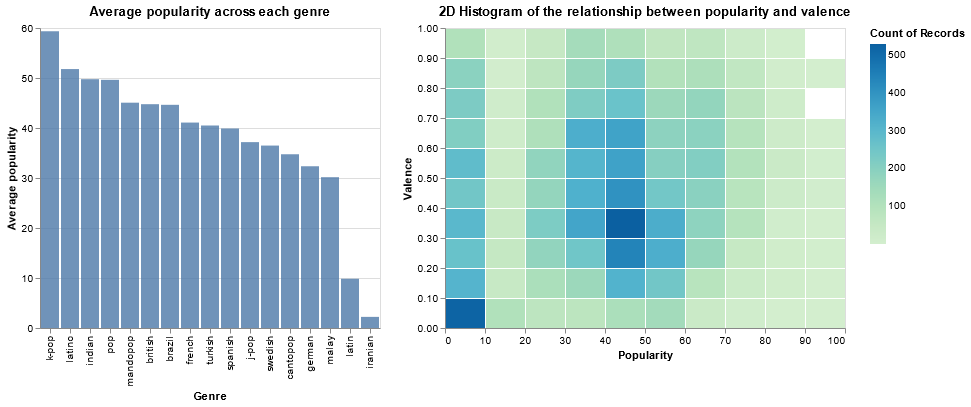

In [62]:
task_1_2Dheatmap = alt.Chart(spotify).mark_bar().encode(
    alt.X('popularity:Q', bin=alt.BinParams(minstep=10), title="Popularity"),
    alt.Y('valence:Q', bin=alt.BinParams(step=0.1), title="Valence"),
    alt.Color('count()', scale=alt.Scale(scheme='greenblue'))
).transform_filter(
    heatmap_select
).properties(
    title="2D Histogram of the relationship between popularity and valence"
)

task_1_popularity | task_1_2Dheatmap

## Visualization 2 (Task 3 + Task 4)

In [59]:
click_select = alt.selection_multi(fields=['genre'])

task_2_bar = alt.Chart(most_popular_spotify).mark_bar().add_selection(
    click_select
).encode(
    alt.X('genre:N', title='Genre', sort='-y'),
    alt.Y('average(valence)', title='Average valence'),
    alt.Color('mode:N'),
    tooltip=['average(valence)', 'mode'],
    opacity=alt.condition(click_select, alt.value(0.8), alt.value(0.1))
).properties(
    title="Average valence across all songs in top 5 popular genres",
    width=250
)


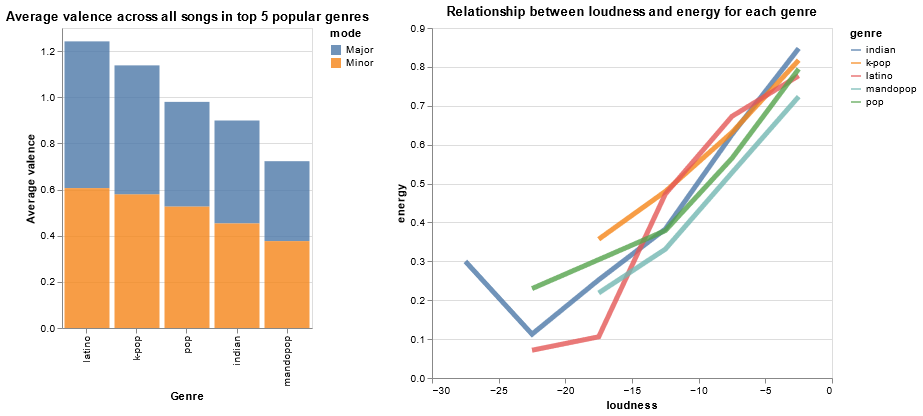

In [60]:
energy_loudness = alt.Chart(most_popular_spotify).mark_line(size=5).add_selection(
    click_select
).encode(
    alt.X('loudness:Q', title='loudness', bin=alt.BinParams(step=5)),
    alt.Y('average(energy)', title='energy'),
    alt.Color('genre:N'),
    opacity=alt.condition(click_select, alt.value(0.8), alt.value(0.1))
).properties(
    title='Relationship between loudness and energy for each genre',
    width=400,
    height=350
)

alt.hconcat(
    task_2_bar, energy_loudness
).resolve_scale(
    color='independent'
)

## Visualization 3 (Task 5)

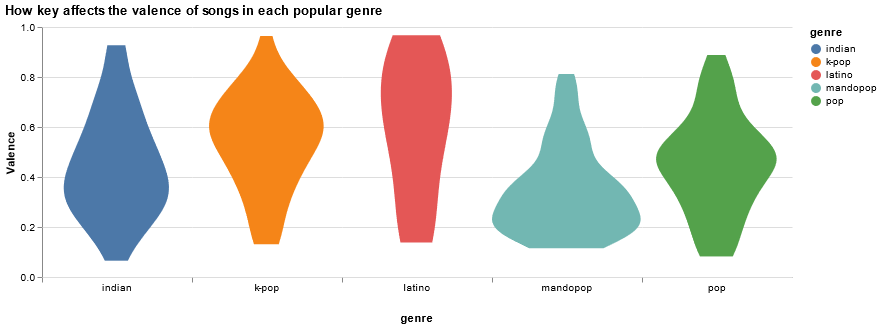

In [32]:
unique_keys = most_popular_spotify['key'].unique()

key_dropdown = alt.selection_single(
    name='keyDropDown',
    fields=['key'],
    init={'key':unique_keys[0]},
    bind=alt.binding_select(options=unique_keys)
)

# violin plot template from https://pages.github.ubc.ca/kemiola/DSCI320-22W2/lectures/8_Distributions.html#box-violin-plots
task_3 = alt.Chart(most_popular_spotify).add_selection(
    key_dropdown
).transform_filter(
    key_dropdown
).transform_density(
    'valence',
    as_=['valence', 'density'],
    groupby=['genre']
).mark_area(orient='horizontal').encode(
    y=alt.Y('valence:Q', title='Valence'),
    color='genre:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0], grid=False, ticks=True),
    ),
    column=alt.Column(
        'genre:N',
        header=alt.Header(
            titleOrient = 'bottom',
            labelOrient = 'bottom',
            labelPadding=0
        ),
    )
).properties(
    width=150,
    height=250,
    title="How key affects the valence of songs in each popular genre"
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

task_3


